Importing libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Loading dataset

In [3]:
data = pd.read_csv('/Users/aadarshamahato/Desktop/elc/data.csv')
test_data = pd.read_csv('/Users/aadarshamahato/Desktop/elc/test.csv')

In [4]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(42000, 785)

Displaying the first few rows of the dataset


In [7]:
print("\nTraining Data Columns:")
print(data.columns)
print("\nTest Data Columns:")
print(test_data.columns)


Training Data Columns:
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Test Data Columns:
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


Data Preparation for Model Building

In [10]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [11]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [13]:
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


In [14]:
type(X)

pandas.core.frame.DataFrame

6


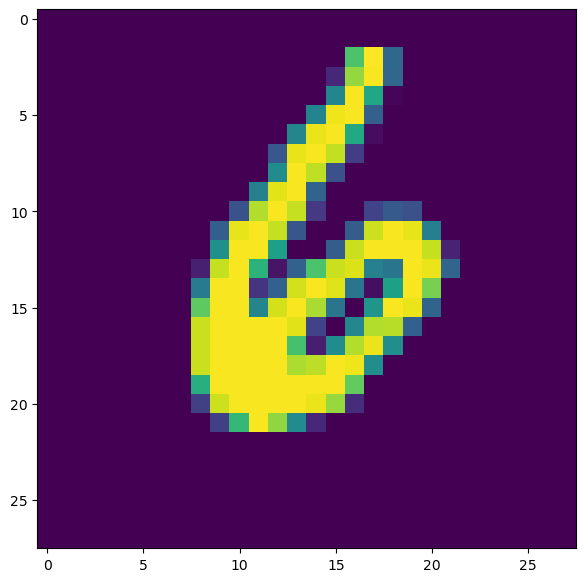

In [15]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = X.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

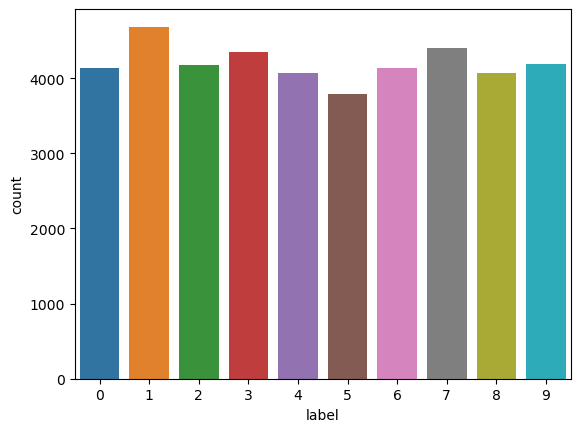

In [16]:
sns.countplot( x='label', data=data)

Ensuring the data is C-contiguous

In [17]:
X = np.ascontiguousarray(X)
X_test = np.ascontiguousarray(X_test)


Defining function to train and evaluate KNN model

In [18]:
def evaluate_knn(X, y, k_values, train_sizes):
    results = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            classific_report=classification_report(y_test, y_pred)
            results.append((train_size, k, accuracy, conf_matrix,classific_report))
    return results

Defining k values and train-test split ratios

In [19]:
k_values = [2, 4, 5, 6, 7, 10]
train_sizes = [0.60, 0.70, 0.75, 0.80, 0.90, 0.95]


Evaluating the model

In [20]:
results = evaluate_knn(X, y, k_values, train_sizes)


DIsplaying Result

In [21]:
for train_size, k, accuracy,conf_matrix,classific_report in results:
    print(f"\nTrain Size: {train_size*100}%, K: {k}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("classification report:")
    print(classific_report)
    #print(classific_report)
    print("\n")


Train Size: 60.0%, K: 2
Accuracy: 0.9567261904761905
Confusion Matrix:
[[1621    0    1    0    0    0    4    0    0    0]
 [   0 1847    2    0    1    0    0    1    0    0]
 [  17   27 1627    3    2    2    0   12    3    1]
 [   2    9   17 1711    0   15    1    8    9    4]
 [   3   19    0    0 1587    0    3    3    0   18]
 [   5    5    1   56    5 1375   12    0    3    5]
 [  24    5    1    1    4    9 1650    0    0    0]
 [   1   27   12    0    6    1    0 1714    0   12]
 [  14   22   19   55    9   45    8    7 1450   10]
 [  11    8    2   19   50    6    1   55    4 1491]]
classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1626
           1       0.94      1.00      0.97      1851
           2       0.97      0.96      0.96      1694
           3       0.93      0.96      0.95      1776
           4       0.95      0.97      0.96      1633
           5       0.95      0.94      0.94      

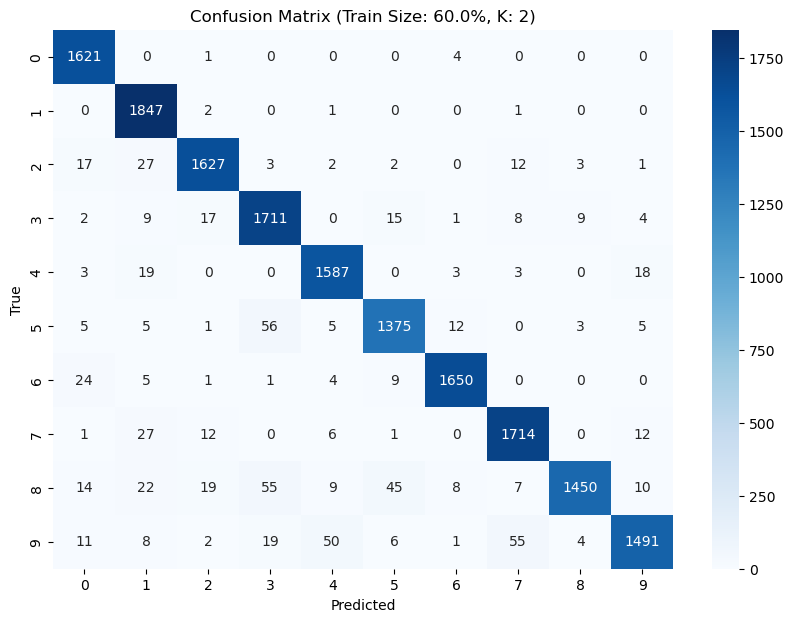

In [22]:
sample_conf_matrix = results[0][3]  # Choose the first scenario for plotting
plt.figure(figsize=(10, 7))
sns.heatmap(sample_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (Train Size: {results[0][0]*100}%, K: {results[0][1]})')
plt.show()

**Plotting and saving confusion matrices**

In [23]:
import matplotlib.backends.backend_pdf


In [24]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/aadarshamahato/Desktop/elc/KNN_Evaluation_Results.pdf")


In [25]:
for train_size, k, accuracy, conf_matrix, class_report in results:
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Train Size: {train_size*100}%, K: {k})\nAccuracy: {accuracy:.4f}')
    pdf.savefig()
    plt.close()

pdf.close()